# PC 6 : Résolution numérique de problèmes non-linéaires

**<big> Préparation avant la PC :</big>** 
**La question 1 des exercices 1 et 2 sont à préparer** avant la séance de PC.

In [10]:
# Ce package permet de travailler efficacement avec des tableaux
import numpy as np
# Ce package propose des fonctions classiques d'algebre lineaire
import numpy.linalg as lin
# On pourra se servir des fonctions lu_factor et lu_solve pour construire la méthode de Newton pour les systèmes 
from scipy.linalg import lu_factor, lu_solve

# Ce package permet de faire des sorties graphiques
from matplotlib import pyplot as plt

# Ce package permet de travailler avec une arithmetique d'intervalle
# utilise a l'exercice 4
from mpmath import iv, mpf

## Exercice 1 : Méthode de Newton

### Question 1 : Quelques exemples

Dans cet exercice, on considère les fonctions suivantes 

$$f_1(x) = e^x - 2, \qquad{} f_2(x) = \displaystyle \frac{x}{\sqrt{1+x^2}}, \qquad{} f_3(x) = x^3.  \qquad{} (1)$$

$1$. Pour chacune de ces fonctions, écrire explicitement la suite récurrente donnée par l'algorithme de Newton. 

$2$. En général, sous quelle condition formelle sur $x_0\in\mathbb{R}$ l'algorithme de Newton converge t-il? Déterminer, pour chacune des fonctions, pour quelles valeurs de $x_0$ l'algorithme va converger ou diverger.

### Question 2 : Ordre de convergence

> On note $x^*$ le zéro qu'on cherche à approcher, et $\epsilon_n = |x_n-x^*|$ l'erreur à l'itération $n$. Si $(x_n)$ converge vers $x^*$, on rappelle que l'ordre de convergence de la suite $(x_n)$ est la plus grande constante $\tau\geq 1$ telle qu'il existe une constant $C>0$ ($C<1$ si $\tau=1$) satisfaisant 
>
>$$\epsilon_{n+1} \le C \epsilon_n^\tau \qquad{}\forall~n\geq 0.$$
>
> On parle de convergence linéaire si $\tau=1$, de convergence quadratique si $\tau=2$, etc.

$1$. Déterminer l'ordre de convergence de la méthode de Newton pour les fonctions $f_2$ et $f_3$ définies en (1).

$2$. Comme on ne peut effectuer qu'un nombre fini d'opérations, on introduit généralement un, ou plusieurs, critère d'arrêt dans l'algorithme de Newton. L'algorithme s'arrête à l'itération $n$ si ce, ou l'un de ces, critère est vérifié. On propose les trois critères d'arrêt suivants 

$$n>N, \qquad{} \epsilon_n < TOL, \qquad{} |x_{n+1}-x_n| < TOL,$$

où $N$ est un entier qui fixe le nombre maximal d'itérations (e.g $N=100$), et $TOL$ est un réel qui fixe la tolérance visée (e.g $TOL=10^{-7}$). Expliquer l'utilité de ces trois critères d'arrêt. 

$3$. En pratique, il est souvent impossible d'évaluer $\epsilon_n$ puisqu'on ne connait pas le zéro $x^*$ a priori. On peut alors considérer *l'erreur résiduelle* $\delta_n=\vert f(x_n)\vert$. Montrer que, si $f'(x^*)\neq 0$, on obtient le même ordre de convergence pour l'erreur résiduelle que pour $\epsilon_n$.

$4$. **<font color=black><span style="background-color:skyblue">À rendre</span></font> :**

$a$. Implémenter la méthode de Newton et tester la avec les trois fonctions introduites en (1) avec une initialisation $x_0 = 0.5$ une tolérance $TOL = 10^{-12}$ sur l'erreur résiduelle $|f(x)|$ et un nombre maximum d'itérations $N_{\max} = 50$.

$b$. Considérons la borne haute de l'erreur, donnée par la suite $\epsilon_{n+1} = C \epsilon_n^\tau$. Exprimer chaque itération de cette suite en fonction de $\epsilon_0$, de $n$, et des paramètres $C$ et $\tau$.

$c$. Calculer pour chaque fonction $f$ l'erreur numérique $\epsilon_n$ et la tracer en échelle log en fonction de $n$. 

$d$. Ces graphes ne permettent de valider le taux de convergence que lorsque $\tau =1$. Alternativement, tracer $\epsilon_{n+1}$ en fonction de $\epsilon_{n}$ en échelle log-log. Comparer avec des fonctions linéaire, quadratique et cubique. Vérifier les ordres de convergence calculés à la question précédente. Observer également l'erreur résiduelle, commenter.

In [11]:
# a.
def Newton_scalaire(f, df, x0, tol=1.e-12, N_max=50):
    """
    Calcule les itérés successifs x_n obtenus par la méthode de Newton
    ----------   
    parametres:
    f      : fonction dont on cherche le zero
    df     : fonction dérivée de f
    x_0    : valeur initiale de la suite
    tol    : on utilise | f(x_n) | < tol comme critère d'arrêt 
    N_max : nombre maximal d'itérations
    
    valeurs de retour:
    tab_x  : tableau contenant les valeurs x_n à chaque itération
    """    
    x = x0
    fx = f(x)
    i = 0
    while np.abs(fx) > tol and i <= N_max:
        x -= fx/df(x)
        fx = f(x)
        i += 1
    return x

In [12]:
def f1(x):
    # définition de f1
    return np.exp(x) - 2

def df1(x):
    # définition de la dérivée de f1
    return np.exp(x)

In [13]:
def f2(x):
    # définition de f2
    return x/np.sqrt(1+x**2)

def df2(x):
    # définition de la dérivée de f2
    return (1 - x**2)/(x**4 + 2*x**2 + 1)

In [14]:
def f3(x):
    # définition de f3
    return x**3

def df3(x):
    # définition de la dérivée de f3
    return 3*x**2

In [15]:
# Cellule de test

x0 = 0.5

x1 = Newton_scalaire(f1, df1, x0)
x2 = Newton_scalaire(f2, df2, x0)
x3 = Newton_scalaire(f3, df3, x0)

print(f"Root found: f1({x1}) = {f1(x1)}")
print(f"Root found: f2({x2}) = {f2(x2)}")
print(f"Root found: f3({x3}) = {f3(x3)}")

Root found: f1(0.6931471805599454) = 0.0
Root found: f2(0.0) = 0.0
Root found: f3(6.682859107149275e-05) = 2.984605365087988e-13


**Réponse :** $b$.



In [20]:
# Test sur f1
x1 = np.log(2)
eps_n_f1 = [np.abs(Newton_scalaire(f1, df1, x0, 0, i) - x1) for i in range(51)]


[]

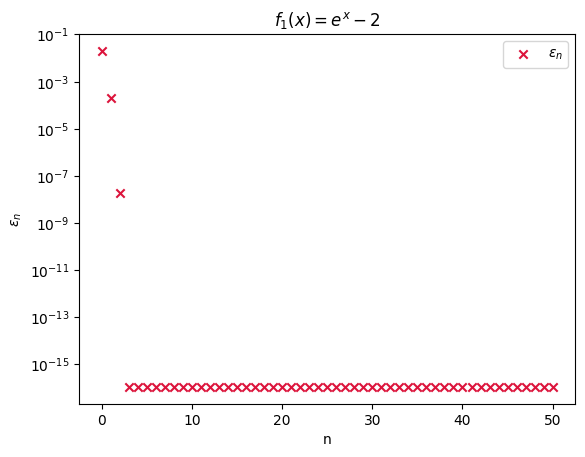

In [40]:
# c.1. Tracer la courbe de convergence eps_n en fonction de n en échelle log
### Vous pouvez copier-coller les cellules des PC précédentes pour tracer les figures
### Attention à l'erreur considérée à tracer 
### Ne pas oublier la légende, les échelles, les noms des axes...
plt.scatter(range(len(eps_n_f1)), eps_n_f1, color='crimson', marker='x', label='$\\epsilon_{n}$')
plt.ylabel("$\\epsilon_{n}$")
plt.xlabel("n")
plt.title("$f_1(x) = e^x - 2$")
plt.semilogy()
plt.legend()
plt.plot()


[]

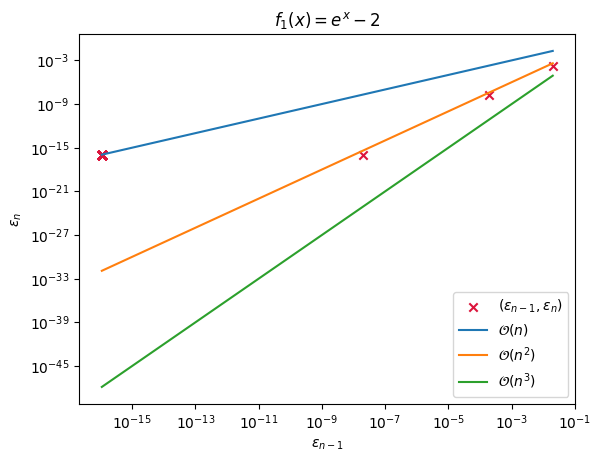

In [48]:
# d.1. Tracer la courbe de convergence eps_n+1 en fonction de eps_n en échelle log-log
# Comparer avec des fonctions linéaires, quadratiques et cubiques 
### Vous pouvez copier-coller les cellules des PC précédentes pour tracer les figures
### Attention à l'erreur considérée à tracer 
### Ne pas oublier la légende, les échelles, les noms des axes...
eps_max1 = np.max(eps_n_f1)
eps_min1 = np.min(eps_n_f1)
plt.scatter(eps_n_f1[:-1], eps_n_f1[1:], color='crimson', marker='x', label='$(\\epsilon_{n-1}, \\epsilon_{n})$')
plt.loglog([eps_min1, eps_max1], [eps_min1, eps_max1], label='$\\mathcal{O}(n)$')
plt.loglog([eps_min1, eps_max1], [eps_min1**2, eps_max1**2], label='$\\mathcal{O}(n^2)$')
plt.loglog([eps_min1, eps_max1], [eps_min1**3, eps_max1**3], label='$\\mathcal{O}(n^3)$')
plt.ylabel("$\\epsilon_{n}$")
plt.xlabel("$\\epsilon_{n - 1}$")
plt.title("$f_1(x) = e^x - 2$")
plt.legend()
plt.plot()


In [42]:
# Test sur f2
x2 = 0.
eps_n_f2 = [np.abs(Newton_scalaire(f2, df2, x0, 0, i) - x2) for i in range(51)]

[]

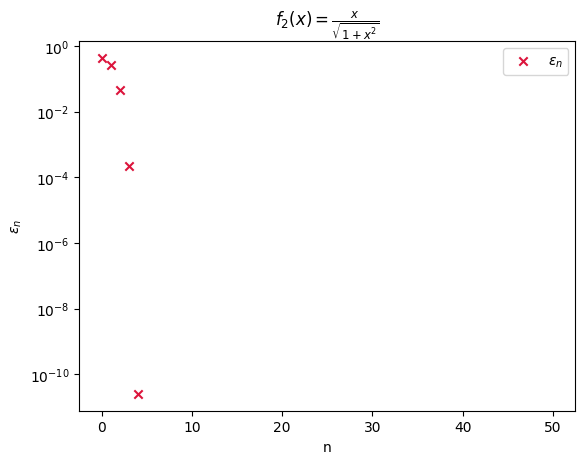

In [52]:
# c.2. Tracer la courbe de convergence eps_n en fonction de n en échelle log
### Vous pouvez copier-coller les cellules des PC précédentes pour tracer les figures
### Attention à l'erreur considérée à tracer 
### Ne pas oublier la légende, les échelles, les noms des axes... 

plt.scatter(range(len(eps_n_f2)), eps_n_f2, color='crimson', marker='x', label='$\\epsilon_{n}$')
plt.ylabel("$\\epsilon_{n}$")
plt.xlabel("n")
plt.title("$f_2(x) = \\frac{x}{\\sqrt{1 + x^2}}$")
plt.semilogy()
plt.legend()
plt.plot()

[]

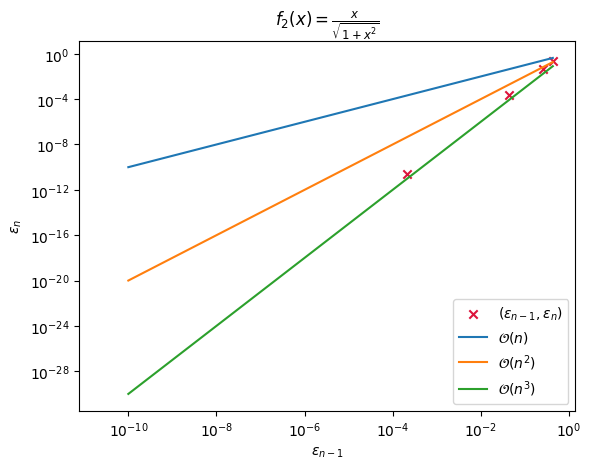

In [50]:
# d.2. Tracer la courbe de convergence eps_n+1 en fonction de eps_n en échelle log-log
# Comparer avec des fonctions linéaires, quadratiques et cubiques 
### Vous pouvez copier-coller les cellules des PC précédentes pour tracer les figures
### Attention à l'erreur considérée à tracer 
### Ne pas oublier la légende, les échelles, les noms des axes... 
eps_max2 = np.max(eps_n_f2)
eps_min2 = max(np.min(eps_n_f2), 1e-10)
plt.scatter(eps_n_f2[:-1], eps_n_f2[1:], color='crimson', marker='x', label='$(\\epsilon_{n-1}, \\epsilon_{n})$')
plt.loglog([eps_min2, eps_max2], [eps_min2, eps_max2], label='$\\mathcal{O}(n)$')
plt.loglog([eps_min2, eps_max2], [eps_min2**2, eps_max2**2], label='$\\mathcal{O}(n^2)$')
plt.loglog([eps_min2, eps_max2], [eps_min2**3, eps_max2**3], label='$\\mathcal{O}(n^3)$')
plt.ylabel("$\\epsilon_{n}$")
plt.xlabel("$\\epsilon_{n - 1}$")
plt.title("$f_2(x) = \\frac{x}{\\sqrt{1 + x^2}}$")
plt.legend()
plt.plot()


In [51]:
# Test sur f3
x3 = 0.
eps_n_f3 = [np.abs(Newton_scalaire(f3, df3, x0, 0, i) - x2) for i in range(51)]

[]

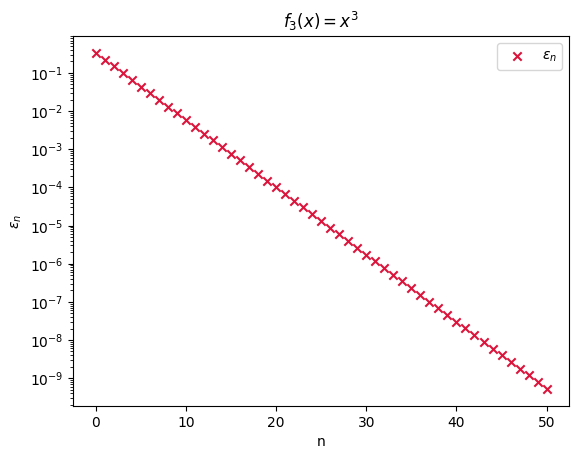

In [53]:
# c.3. Tracer la courbe de convergence eps_n en fonction de n en échelle log
### Vous pouvez copier-coller les cellules des PC précédentes pour tracer les figures
### Attention à l'erreur considérée à tracer 
### Ne pas oublier la légende, les échelles, les noms des axes...
plt.scatter(range(len(eps_n_f3)), eps_n_f3, color='crimson', marker='x', label='$\\epsilon_{n}$')
plt.ylabel("$\\epsilon_{n}$")
plt.xlabel("n")
plt.title("$f_3(x) = x^3$")
plt.semilogy()
plt.legend()
plt.plot()


[]

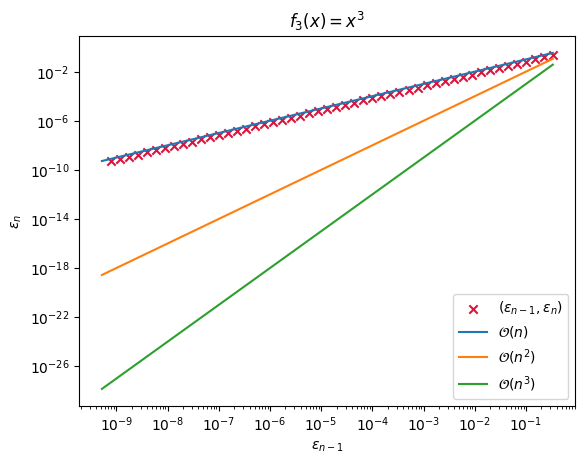

In [56]:
# d.3. Tracer la courbe de convergence eps_n+1 en fonction de eps_n en échelle log-log
# Comparer avec des fonctions linéaires, quadratiques et cubiques 
### Vous pouvez copier-coller les cellules des PC précédentes pour tracer les figures
### Attention à l'erreur considérée à tracer 
### Ne pas oublier la légende, les échelles, les noms des axes...

eps_max3 = np.max(eps_n_f3)
eps_min3 = np.min(eps_n_f3)
plt.scatter(eps_n_f3[:-1], eps_n_f3[1:], color='crimson', marker='x', label='$(\\epsilon_{n-1}, \\epsilon_{n})$')
plt.loglog([eps_min3, eps_max3], [eps_min3, eps_max3], label='$\\mathcal{O}(n)$')
plt.loglog([eps_min3, eps_max3], [eps_min3**2, eps_max3**2], label='$\\mathcal{O}(n^2)$')
plt.loglog([eps_min3, eps_max3], [eps_min3**3, eps_max3**3], label='$\\mathcal{O}(n^3)$')
plt.ylabel("$\\epsilon_{n}$")
plt.xlabel("$\\epsilon_{n - 1}$")
plt.title("$f_3(x) = x^3$")
plt.legend()
plt.plot()

**Réponse :** $d$. 

Gracê à ces graphes-là, on peut voir que la convergence est linéaire pour $f_3$, quadratique pour $f_1$, et cubique pour $f_2$, comme prevu. En 50 itérations, l'erreur pour le cas linéaire c'est d'ordre $10^{-10}$, pour le cas quadratique c'est d'ordre du $\epsilon_m \approx 10^{-16}$, et pour le cas cubique, c'est nul.

### Question 3 : Cas dégénérés

>Dans cette question, on considère une fonction $f:\mathbb{R}\to\mathbb{R}$ de classe $C^\infty$. On dit qu'un zéro $x^*$ de $f$ est de multiplicité $m$ si 
>
> $$f^{(i)}(x^*) = 0 \quad{} \forall~i\in\{0,\dots,m-1\} \qquad{} \text{et}\qquad{} f^{(m)}(x^*)\neq 0.$$
>
>Il est dégénéré s'il est de multiplicité $m>1$.

$1$. Montrer que si l'algorithme de Newton converge vers un zéro $x^*$ dégénéré alors la convergence est seulement linéaire.
  De même, montrer que si le zéro n'est pas dégénéré, la convergence est au moins quadratique. Expliquer les différences observées à la question 2.

$2$. Soit $x^*$ un zéro de multiplicité $m>1$. Montrer qu'en modifiant l'algorithme de Newton sous la forme
    
$$x_{n+1} = x_n-m\frac{f(x_n)}{f'(x_n)},$$

alors il converge à nouveau quadratiquement. 

$3$. **<font color=black><span style="background-color:skyblue">À rendre</span></font> :**

a. Implémenter l'algorithme de Newton modifié introduit ci-dessus.

b. Tester le pour la fonction $x\mapsto x^2(x^2+2)$. On utilisera un coeficient $m$ adapté et $x_0 = 0.5$.

c. Étudier la convergence de la méthode et commenter. 

In [88]:
# a.
def Newton_scalaire_modif(f, df, m, x0, tol=1.e-12, N_max=50):
    """
    Calcule les itérés successifs x_n obtenus par la méthode de Newton modifiée
    ----------   
    parametres:
    f     : fonction dont on cherche le zero
    df    : fonction dérivée de f
    m     : entier qui correspond à l'ordre du zéro
    x_0   : valeur initiale de la suite
    tol   : on utilise | f(x_n) | < tol comme critère d'arrêt 
    N_max : nombre maximal d'itérations
    
    valeurs de retour:
    tab_x  : tableau contenant les valeurs x_n à chaque itération
    """
    tabx = np.zeros(N_max + 2)
    x = x0
    fx = f(x)
    i = 0
    tabx[i] = x
    while np.abs(fx) > tol and i <= N_max:
        x -= m*fx/df(x)
        fx = f(x)
        i += 1
        tabx[i] = x
    return tabx[:i + 1]

In [89]:
# b.
def f4(x):
    #définition de la fonction f4
    return x*x*(x*x+2)

def df4(x):
    #définition de la fonction défivée de f4
    return 4*x*(x**2 + 1)

In [94]:
# Test sur f4
x0 = 0.5
tabx4 = Newton_scalaire_modif(f4, df4, 2, x0)
x4 = tabx4[-1]

print(f"Root found: f4({x4}) = {f4(x4)}")

x4 = 0.
eps_n_f4 = [np.abs(x4_ - x4) for x4_ in Newton_scalaire_modif(f4, df4, 2, x0, 0, 50)]


Root found: f4(1.2115933527723916e-13) = 2.9359169049644897e-26


[]

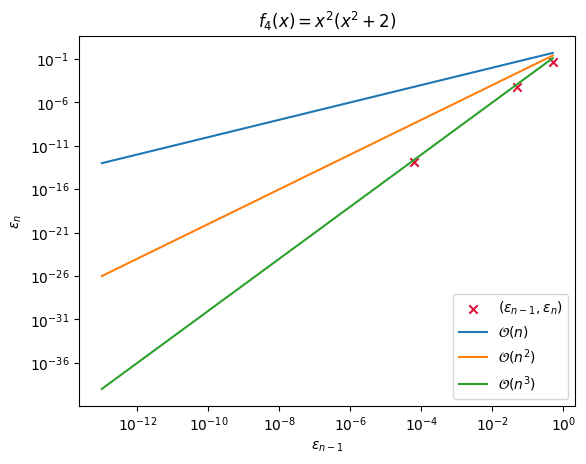

In [101]:
# c.
# 4. Tracer la courbe de convergence eps_n+1 en fonction de eps_n en échelle log-log
# Comparer avec des fonctions linéaires, quadratiques et cubiques 
### Vous pouvez copier-coller les cellules des PC précédentes pour tracer les figures
### Attention à l'erreur considérée à tracer 
### Ne pas oublier la légende, les échelles, les noms des axes...

eps_max4 = np.max(eps_n_f4)
eps_min4 = max(np.min(eps_n_f4), 1e-13)
plt.scatter(eps_n_f4[:-1], eps_n_f4[1:], color='crimson', marker='x', label='$(\\epsilon_{n-1}, \\epsilon_{n})$')
plt.loglog([eps_min4, eps_max4], [eps_min4, eps_max4], label='$\\mathcal{O}(n)$')
plt.loglog([eps_min4, eps_max4], [eps_min4**2, eps_max4**2], label='$\\mathcal{O}(n^2)$')
plt.loglog([eps_min4, eps_max4], [eps_min4**3, eps_max4**3], label='$\\mathcal{O}(n^3)$')
plt.ylabel("$\\epsilon_{n}$")
plt.xlabel("$\\epsilon_{n - 1}$")
plt.title("$f_4(x) = x^2(x^2 + 2)$")
plt.legend()
plt.plot()

**Réponse :** $c$. 

D'après le graphe, la convergence est cubique, alors il converge très bien.


## Exercice 2 : Bissection, trissection et algorithme hybride 

> Dans tout cet exercice, on considère une fonction continue $f:[a,b] \to \Bbb{R}$ avec $f(a)f(b) \leq 0$. 

### Question 1

>On considère $k\geq 2$ fixé et on suppose maintenant qu'à chaque itération, on découpe l'intervalle en $k\geq 2$ sous-intervalles de même longueurs, et qu'on garde un intervalle sur lequel $f$ change de signe pour l'itération suivante ($k=2$ correspond à la bissection, $k=3$ à la trissection, etc). 

$1$. Montrer que l'erreur (c'est à dire la longueur de l'intervalle dans lequel on est sûr qu'il existe un zéro), en fonction de $b-a$, de $k$, et du nombre $n$ d'évaluations de $f$ qu'on a effectué, peut s'écrire

$$err_{k,n} = \frac{b-a}{k^{\left\lfloor \frac{n}{k-1}\right\rfloor}},$$

où $\left\lfloor \cdot\right\rfloor$ est la partie entière. *On supposera que $f(a)$ et $f(b)$ ont été évalués, et on ne les comptera donc pas dans le nombre d'évaluations de $f$*.

$2$. Trouver l'entier $k\geq 2$ qui donne asymptotiquement (pour un grand nombre d'évaluations $n$ de $f$) la plus petite erreur.

### Question 2

**<font color=black><span style="background-color:skyblue">À rendre</span></font> :**

a. Implémenter une fonction qui applique la méthode de la bissection et renvoye le tableaux des points milieux $x_n$ des intervales à chaque itération. *Penser à vérifier dès le début de l'algorithme qu'on a bien $f(a)$ et $f(b)$ de signe différent.* 

b. Tester votre algorithme sur la fonction $g(x) = \ln(x)+2$, avec $a=0.1$ et $b=1$.

c. Tracer une courbe d'erreur $\epsilon_n = |x_n-x_*|$ en fonction de $n$. À partir de l'étude de convergence à la question précédente, proposer une courbe de référence à laquelle comparer cette courbe d'erreur et tracer les deux courbes sur le même graphe et avec une échelle adaptée. 

In [ ]:
# a.
def bissection(f, a, b, tol=1.e-12, N_max=500):
    """
    Calcule les itérés successifs x_n obtenus par la méthode de la bissection sur [a,b]
    ----------   
    parametres:
    f     : fonction dont on cherche le zero
    a,b   : bornes de l'intervalle dans lequel on cherche un zéro
    tol   : on utilise | a - b | < tol comme critère d'arrêt 
    N_max : nombre maximal d'itérations
    
    valeurs de retour:
    tab_x : tableau contenant les valeurs x_n à chaque itération
    """  
                
    return 

In [ ]:
# Cellule de test
# par exemple : vérifier que les premières itérations correspondent à des intervalles sur lesquels la fonction change de signe



In [ ]:
#b. 
def g(x):
    # définition de la fonction f
    return np.log(x) + 2

In [ ]:
# Test sur f



In [ ]:
#c.
# Tracer la courbe de convergence
# Comparer avec une fonction de référence 
### Attention à l'erreur que vous cherchez à tracer 
### Ne pas oublier la légende, les échelles, les noms des axes...



### Question 3 

>On considère maintenant une fonction $f:[a,b] \to \Bbb{R}$ de classe $\mathcal{C}^2$, toujours avec $f(a)f(b) \leq 0$. On va chercher à combiner les avantages des méthodes étudiées jusqu'ici pour obtenir un algorithme hybride Bissection-Newton, qui converge à chaque fois comme la bissection, mais avec une vitesse de convergence qui soit asymptotiquement quadratique si le zéro est non-dégénéré, comme pour la méthode de Newton. 

Considérons la fonction $h(x) = x^5-x+1$ sur l'intervalle $[-2.5,2.5]$.

$1$. **<font color=black><span style="background-color:deepskyblue">Bonus</span></font> :** Tester la méthode de Newton pour cette fonction avec $x_0=-1$, puis avec $x_0=1$. En cas de non-convergence, expliquer le comportement observé.

In [ ]:
def h(x):
    # définition de la fonction h
    return x**5 - x + 1.

def dh(x):
    # définition de la fonction dérivée de h
    return 

In [ ]:
# Test sur h



**Réponse :**

On va maintenant chercher à combiner les méthodes étudiées jusqu'ici pour obtenir un algorithme hybride Bissection-Newton, qui évite le problème de non-convergence observé ci-dessus, mais pour lequel on puisse toujours espérer une convergence asymptotiquement quadratique. 

On considère l'algorithme hybride Bissection-Newton suivant :
- Initialisation avec $a_0<b_0$ tels que $f(a_0)f(b_0)\leq 0$ et $x_0=(a_0+b_0)/2$
- Itération : À chaque itération $n$, 
    + Calculer le point milieu $x_{n+1}^{bis} := \frac{a_n + b_n}{2}$.
    + Calculer le point donnée par l'itération de Newton $x_{n+1}^{Newt} := x_n - \frac{f(x_n)}{f'(x_n)}$.
    + Si $x_{n+1}^{Newt}$ n'est pas dans l'intervalle $[a_n,b_n]$, prendre $x_{n+1}=x_{n+1}^{bis}$, sinon prendre pour $x_{n+1}$ celui qui minimise $\vert f\vert$ entre $x_{n+1}^{bis}$ et $x_{n+1}^{Newt}$.
    + Mettre à jour l'intervalle $[a_{n+1},b_{n+1}]$ comme dans la méthode de la bissection. 

L'algorithme s'arrête si $b_n-a_n < tol$, ou si $|f(x_n)|<tol$, ou si $n>N_{\max}$.

$2$. **<font color=black><span style="background-color:deepskyblue">Bonus</span></font> :**  Implémenter cet algorithme. Tester votre algorithme sur la fonction $h$ définie ci-dessus avec $a_0 = -2.5$ et $b_0 = 2.5$. Représenter graphiquement les erreurs $b_n-a_n$ et $|f(x_n)|$ et commenter le comportement de votre algorithme. 

In [ ]:
def hybride(f, df, a, b, tol=1.e-12, N_max=50):
    """
    Calcule les itérés successifs x_n obtenus par la méthode hybride bissection-Newton sur [a,b]
    ----------   
    parametres:
    f     : fonction dont on cherche le zero
    df    : fonction dérivée de f
    a,b   : bornes de l'intervalle dans lequel on cherche un zéro
    tol   : tolérance pour le critère d'arrêt 
    N_max : nombre maximal d'itérations
    
    valeurs de retour:
    tab_x : tableau contenant les valeurs x_n à chaque itération
    """        
 
    return 

In [ ]:
# Test sur h



In [ ]:
# Tracer la courbe de convergence
# Comparer avec les erreurs calculées au 1.



**Réponse :**

## Exercice 3 : Un système non-linéaire

On étudie ici la méthode de Newton et de quasi-Newton pour la résolution du système suivant, inspiré de [[1](#Wos),[2](#High)]

$$ \left\{\begin{array}{rl} x_1 - x_2 &= 0, \\ x_1^3 + \mu x_2^3 - \mu &=0, \end{array} \right. \qquad{} (2) $$

où $\mu\in\mathbb{R}$ est un paramètre du problème.

### Question 1 : Méthode de Newton

$1$. Mettre le système (2) sous la forme $F(x) = 0$ avec $x=(x_1,x_2)^T$ et calculer explicitement la Jacobienne $J_F(x)$ et son déterminant. 

$2$. **<font color=black><span style="background-color:skyblue">À rendre</span></font> :** Implémenter l'algorithme de Newton pour ce problème et le tester avec $\mu = 1$, $x_0=(1,2)^T$ un nombre d'itération maximum $N_{\max} = 10^3$ et une tolérance $TOL=10^{-15}$ sur l'erreur résiduelle $\|F(x)\|$. Calculer la solution exacte $x_*$ du système et comparer avec votre solution approchée.

*On pourra utiliser la fonction numpy.linalg.solve pour la résolution du système linéaire à chaque itération de Newton et la fonction numpy.linalg.norm pour le calcul de $\|F(x)\|$.*

In [ ]:
def F(x, mu): 
    """
    Calcule F(x)
    ----------   
    parametres:
    x     : point où F est évalué (np.array de taille 2) 
    mu    : paramètre de la fonction F
    
    valeurs de retour:
    F(x)  : valeur de F au point x (np.array de taille 2) 
    """
    return np.array([x[0]-x[1], x[0]**3 + mu*x[1]**3 - mu])
    
def JF(x,mu):   
    """
    Calcule la jacobienne de F au point x
    ----------   
    parametres:
    x     : point où JF est évalué (np.array de taille 2) 
    mu    : paramètre de la fonction F
    
    valeurs de retour:
    JF(x) : valeur de la jacobienne de F au point x (np.array de taille 2x2) 
    """
    return 

In [ ]:
def Newton_system(mu, x0, tol=1.e-15, N_max=1000):
    """
    Calcule les itérés successifs x_n obtenus par la méthode de Newton sur le système (2)
    ----------   
    parametres:
    mu    : parametre de la fonction F
    x_0   : valeur initiale de la suite
    tol   : on utilise || F(x_n) || < tol comme critère d'arrêt 
    N_max : nombre maximal d'itérations
    
    valeurs de retour:
    tab_x  : tableau contenant les valeurs x_n à chaque itération
    """
        
    return 

In [ ]:
# Test sur F



In [ ]:
# Test unitaire :
# calculer la (unique) solution exacte (x1, x2) du problème F(x) = 0
# vérifier que le résultat numérique obtenu est proche de cette solution exacte 

print("Solution exacte    =", )
print("Solution numérique =", )

$3$. **<font color=black><span style="background-color:skyblue">À rendre</span></font> :** Calculer l'erreur $\epsilon_n = \|x^n-x_*\|$ et afficher $\epsilon_{n+1}$ en fonction de $\epsilon_{n}$ en échelle log-log. Comparer avec des fonctions linéaire, quadratique et cubiques. L'ordre de convergence observé correspond-t-il à celui prédit par la théorie? Observer également l'erreur résiduelle $\|F(x^n)\|$, commenter.

In [ ]:
# Tracer la courbe de convergence
# Comparer avec des fonctions linéaires, quadratiques et cubiques 



**Réponse :**



### Question 2 : Méthode de quasi-Newton

On fixe désormais, pour toutes les itérations, la Jacobienne à sa valeur initiale $J = J_F(x^0)$ dans la méthode de Newton. On écrit donc

$$ x^{k+1} = x^k - J^{-1} F(x^k). $$

$1$. Démontrer que si $x^*$ est un zéro de $F$ tel que $J_F(x^*)$ est inversible, et que $x_0$ est suffisament proche de $x^*$, alors la méthode de quasi-Newton converge linéairement.

$2$. **<font color=black><span style="background-color:deepskyblue">Bonus</span></font> :** Implémenter cet algorithme de quasi-Newton pour le problème (2) et le tester avec $\mu = 1$, $x_0=(1,2)^T$, un nombre d'itération maximum $N_{\max} = 10^3$ et une tolérance $TOL=10^{-15}$ sur l'erreur $\|F(x)\|_2$.

*On pourra utiliser les fonction scipy.linalg.lu_factor pour la décomposition LU et scipy.linalg.lu_solve pour la résolution du système linéaire à chaque itération.*

In [ ]:
def quasi_Newton_system(mu, x0, tol=1.e-15, N_max=1000):
    """
    Calcule les itérés successifs x_n obtenus par la méthode de Newton
    ----------   
    parametres:
    mu    : parametre de la fonction F
    x_0   : valeur initiale de la suite
    tol   : on utilise || F(x_n) || < tol comme critère d'arrêt 
    N_max : nombre maximal d'itérations
    
    valeurs de retour:
    tab_x  : tableau contenant les valeurs x_n à chaque itération
    """   
        
    return 

In [ ]:
# Test sur F



In [ ]:
# Test unitaire :
# vérifier que le résultat numérique obtenu est proche de cette solution exacte 


$3$. **<font color=black><span style="background-color:deepskyblue">Bonus</span></font> :** Tracer les courbes de convergence pour la méthode de quasi-Newton et donner son taux de convergence. Comparer avec la méthode de Newton. Quelle méthode vous parait la plus avantageuse ici? Dans quelles circonstances la méthode de quasi-Newton peut-elle avoir un intérêt?

In [ ]:
# Tracer la courbe de convergence
# Comparer avec des fonctions linéaires, quadratiques et cubiques 



**Réponse :** 



$4$. **<font color=black><span style="background-color:deepskyblue">Bonus</span></font> :** Étudier maintenant les taux de convergence des méthodes de Newton et de quasi-Newton pour $\mu = 0$. Interpréter ce changement.

In [ ]:
# Tracer la courbe de convergence
# Comparer avec des fonctions linéaires, quadratiques et cubiques 



**Réponse :** 



## Exercice 4 : Méthodes de Newton-Kantorovich

>Soit $f:\mathbb{R}\to\mathbb{R}$ une fonction de classe $\mathcal{C}^2$. L'objectif de cet exercice est de présenter une technique qui permettent de **démontrer** l'existence d'un zéro de $f$, et de l'approcher de manière certifiée, en se basant sur la méthode de Newton. Une seconde méthode basée sur l'arithmétique d'intervale (cf PC1) vous est proposée en challenge de ce chapitre. 
  
### Question 1 : Un contre-exemple pour commencer
Appliquer la méthode de Newton à la fonction $h_1(x)=x^2+10^{-15}$. Commenter les résultats obtenus.

In [ ]:
def h1(x):
    #définition de h1
    return x*x+1.e-15

def dh1(x):
    #définition de h1
    return 

In [ ]:
# Test sur h1



**Réponse :** 

### Question 2 : Méthode de Newton-Kantorovich

> Dans cette question, on présente une version simplifiée de théorème de Newton-Kantorovich [[4](#Kan48)]. On renvoit par exemple à [[3](#CiaMar12)] pour une présentation plus générale de ce théorème et de son histoire. On suppose qu'on dispose d'un *zéro approché* $\bar x$ de $f$ (obtenu par exemple à l'aide de la méthode de Newton), et  on va chercher à démontrer qu'il existe un unique zéro $x^*$ de $f$ tel que $\vert x^* - \bar x\vert \leq r$, où $r$ sera connu explicitement.

$1$. **Etude théorique**

> Dans toute cette question, on suppose qu'il existe $\varepsilon\geq 0$ et $K,L,r_*>0$ tels que
>
>$$ \vert f(\bar x)\vert \leq \varepsilon,\qquad{} \vert f'(\bar x)\vert\geq K,\qquad{} \vert f''(x)\vert \leq L \qquad{} \forall~x\in[\bar x-r_*,\bar x+r_*]. $$
>
>On considère l'opérateur de *quasi-Newton* $T$ défini par
>
>$$ T(x) = x-\frac{f(x)}{f'(\bar x)}. $$
  
$a$. Pour tout $x$ dans l'intervalle $[\bar x-r_*,\bar x+r_*]$, établir les estimations suivantes:
  
$$ \vert T'(x) \vert \leq \frac{L}{K} \vert x - \bar x\vert\qquad{}\text{et}\qquad{} \vert T(x) - \bar x\vert \leq \frac{L}{K} \vert x - \bar x\vert ^2 + \frac{\varepsilon}{K}. $$

$b$. On suppose de plus qu'il existe $r\in]0,r_*]$ tel que
  
$$ Lr^2 - Kr +\varepsilon < 0. $$

Démontrer que $T\left([\bar x-r,\bar x+r]\right) \subset [\bar x-r,\bar x+r]$ et que $T$ est contractant sur $[\bar x-r,\bar x+r]$. En déduire l'existence d'un unique zéro de $f$ dans $[\bar x-r,\bar x+r]$.

$2$. **Application**

On considère la fonction $h_2(x)= e^x-x-2$. 

$a$. Obtenir un zéro approché $\bar x$ à l'aide de la méthode de Newton.

In [ ]:
def h2(x):
    #définition de h2
    return np.exp(x)-x-2.

def dh2(x): 
    return 

def d2h2(x): 
    return 

In [ ]:
# Test sur h2



$b$. Prendre $r_*=1$ et évaluer

$$ \tilde\varepsilon := \vert h_2(\bar x)\vert,\qquad{} \tilde K := \vert h_2'(\bar x)\vert,\qquad{} \tilde L:= h_2''(\bar x +r_*) = \sup_{x\in[\bar x-r_*,\bar x+r_*]} \vert h_2''(x)\vert. $$

In [ ]:
# Évaluer ces grandeurs



$c$. Trouver $r\in]0,r_*]$ tel que $\tilde L r^2 - \tilde K r+\tilde \varepsilon <0$. 

In [ ]:
# Évaluer r



$d$. Que manque-t-il pour en déduire rigoureusement l'existence d'un zéro de $h_2$ au voisinage de $\bar x$?

## Références


<a id="Wos">[1] H. Wozniakowski. Numerical stability for solving nonlinear equations. *Numer. Math.*, 27:373-390, 1977.</a>

<a id="High">[2] N. J. Higham. Accuracy and stability of numerical algorithms. Second edition. SIAM. </a>

<a id="CiaMar12">[3] Ph. G. Ciarlet and C. Mardare. On the Newton-Kantorovich theorem. *Analysis and Applications*, 10(03):249--269, 2012.</a>

<a id="Kan48">[4] L. V. Kantorovich. Functional analysis and applied mathematics. *Uspekhi Matematicheskikh Nauk*, 3(6):89--185, 1948.</a>